In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import random

df = pd.read_csv('tsp.csv')
data = np.array(df.values)

In [5]:
def fun(X, Y):
    return 20*np.exp(-((X-2.5)**2+(Y+1.5)**2)/5) +\
                3*(1 + np.sin(0.08*np.pi*X*Y)**2)+\
                3*(np.log(2+(10*(X-2.4))**4 + (10*(Y+1.3))**4)/(1 + ((X**2+Y**2)/100)**0.1))

In [ ]:
def draw(x,y,z):
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    fig.set_size_inches(25, 15)
    ax.plot_surface(x, y, z, linewidth=100, antialiased=False)
#     ax.zaxis.set_major_locator(LinearLocator(10))
#     ax.zaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    plt.show()

In [ ]:
###1###
n = 10000
dist = 100
x1 = np.arange(-10,10,0.1)
y1 = np.arange(-10,10,0.1)
x1, y1 = np.meshgrid(x1, y1)
z1 = fun(x1, y1)
draw(x1,y1,z1)

x = dist*np.random.randn()
y = dist*np.random.randn()
z = fun(x, y)
print("max value = " + str(np.max(z)))

In [25]:
def draw3(x, y):
    x1 = np.arange(-10,10,0.1)
    y1 = np.arange(-10,10,0.1)
    x1, y1 = np.meshgrid(x1, y1)
    z1 = fun(x1, y1)
    fig = plt.figure()
    x, y = np.meshgrid(x, y)
    z = fun(x, y)
    ax = fig.gca(projection='3d')
    fig.set_size_inches(25, 15)
    ax.plot_surface(x1, y1, z1, linewidth=100, antialiased=False)
    ax.scatter(x, y, z, color='r', s=80)
    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    
    plt.show()

In [42]:
###2###
def entropy(it, num, k):
    f_max = 0
    mean1, variance1, mean2, variance2 = -1, 2, 1, 3
    for i in range(it):
        print("iteration " + str(i))
        x = np.random.normal(mean1, variance1, num)
        y = np.random.normal(mean2, variance2, num)
        z = fun(x, y)
        if np.max(z) > f_max:
            f_max = np.max(z)
        print("    params for distribution x")
        print("        mean = " + str(mean1) + " variance = " + str(variance1))
        print("    params for distribution y")
        print("        mean = " + str(mean2) + " variance = " + str(variance2))
        k_best = np.argsort(z)[-k:]
        mean1 = x[k_best].mean()
        mean2 = y[k_best].mean()    
        variance1 = x[k_best].var() + max(5-i/10, 0)
        variance2 = y[k_best].var() + max(5-i/10, 0)
        if variance1 > 10**13 or variance2 > 10**13:
            break
        draw3(x, y)
        
    return f_max

iteration 0
    params for distribution x
        mean = -1 variance = 2
    params for distribution y
        mean = 1 variance = 3


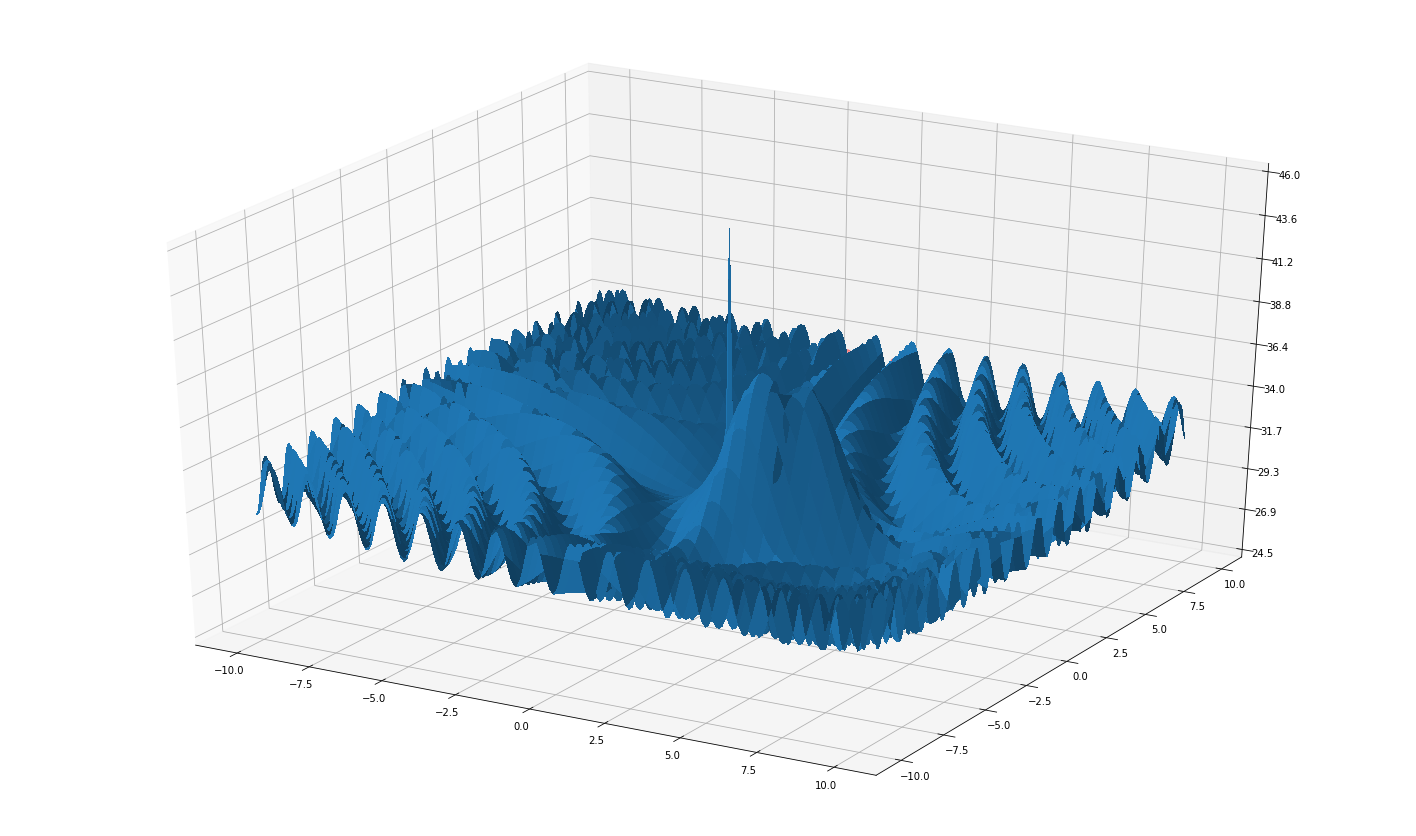

iteration 1
    params for distribution x
        mean = 0.6807616197064367 variance = 8.394200047786601
    params for distribution y
        mean = 0.8961277488527388 variance = 16.841030146100014


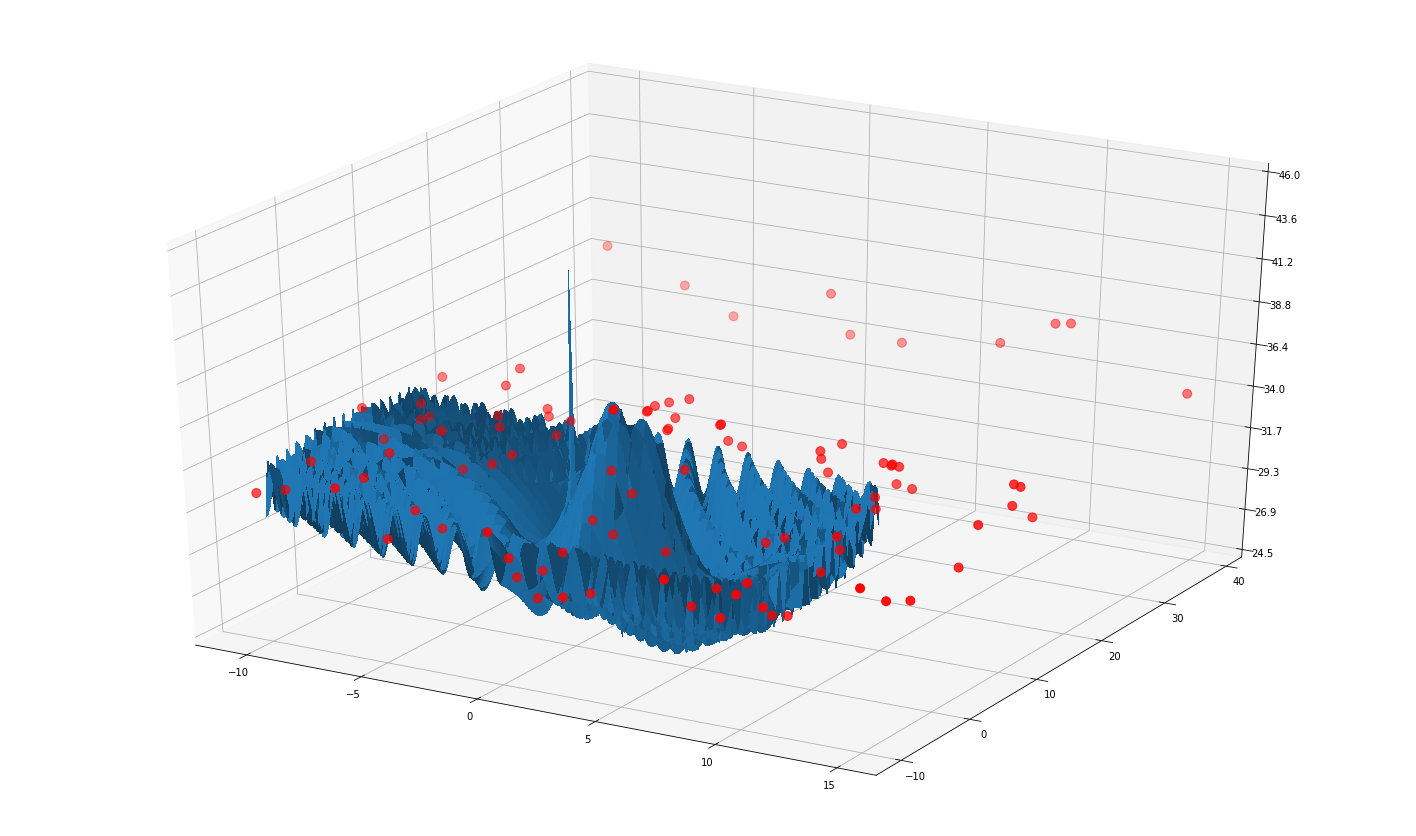

iteration 2
    params for distribution x
        mean = 2.0554374274872087 variance = 63.61279851853448
    params for distribution y
        mean = 8.470493072478016 variance = 176.5540147852107


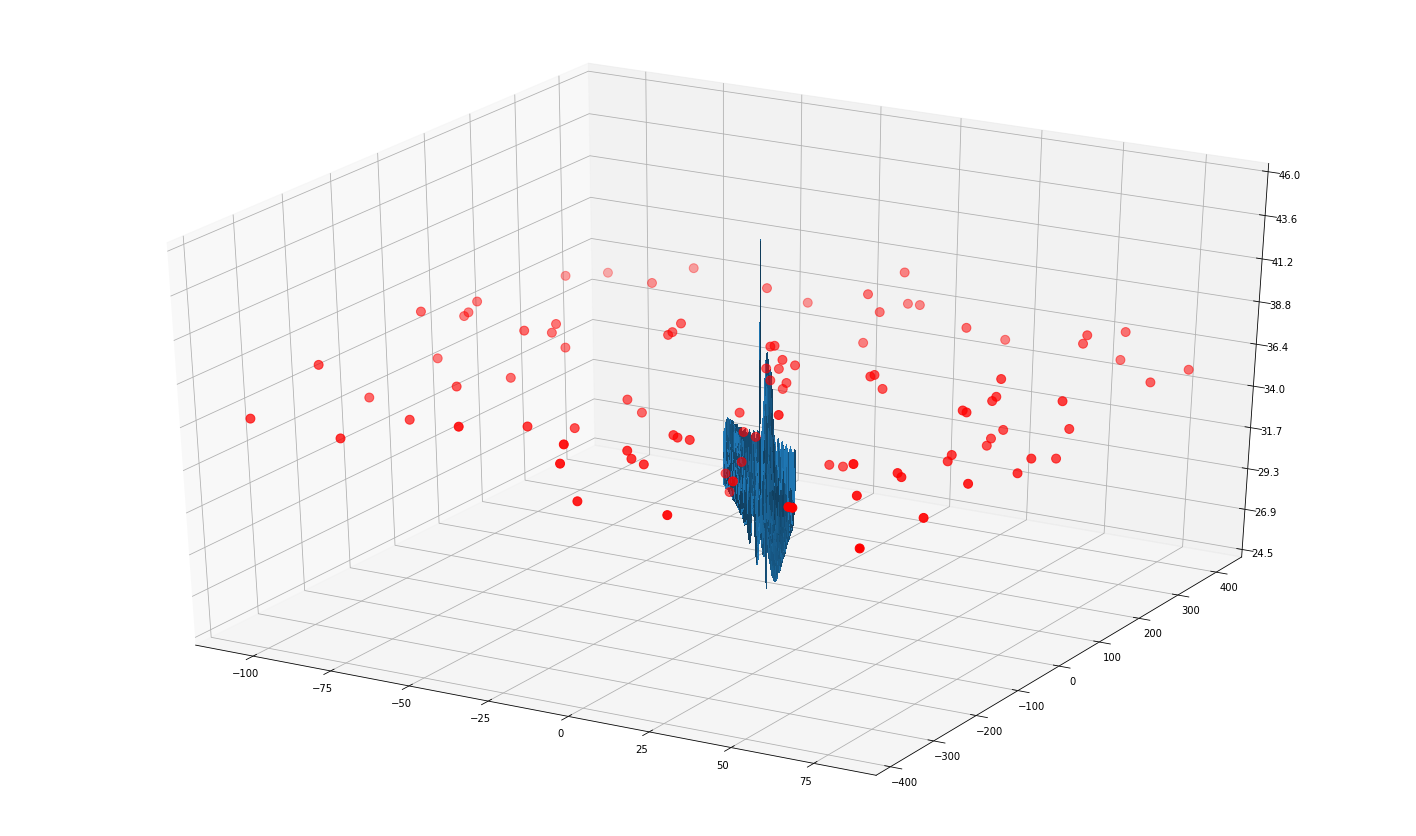

iteration 3
    params for distribution x
        mean = -2.0274149970104927 variance = 3281.727899293061
    params for distribution y
        mean = 28.16174466059267 variance = 49647.3355696495


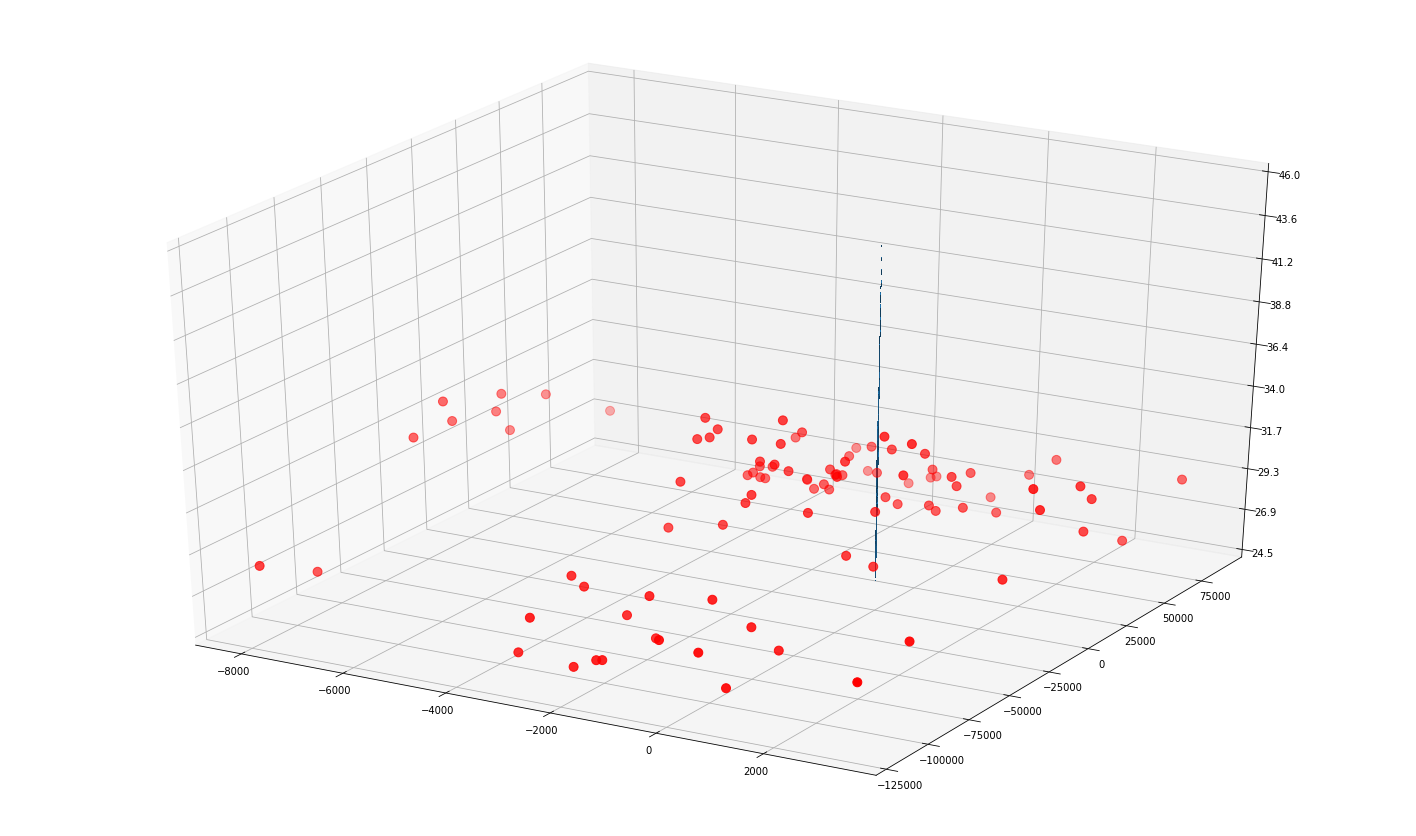

iteration 4
    params for distribution x
        mean = -1519.519352459452 variance = 8037335.61059055
    params for distribution y
        mean = -4228.832670024801 variance = 3326096949.078172
max = 37.861500220541366


In [47]:
f_max = entropy(100, 10, 13)
print("max = " + str(f_max))

In [48]:
def L1(x, y):
    return np.sum(np.abs(x-y))

In [49]:
def len_path(s, points):
    neibs = np.zeros((s.shape[0], 2), dtype=int)
    neibs[:, 0] += s
    neibs[-1, 1] = s[0]
    neibs[:-1, 1] = s[1:]
    return np.sum(L1(points[neibs[:,0]], points[neibs[:,1]]))

In [50]:
def gen_state(state):
    ix = np.random.permutation(state.shape[0])[:2]
    ix = np.sort(ix)
    new_state = np.append(np.append(np.append(state[:ix[0]], (state[ix[0]:ix[1]])[::-1]), [state[ix[1]:-1]]), [state[0]])
    return new_state

In [51]:
def draw2(s, points):
    cities_x = points[:,0]
    cities_y = points[:,1]

    plt.scatter(cities_x, cities_y, color='r')
    idx = np.arange(s.shape[0])
    
    x1, x2 = points[s[idx[:-1]]][:,0], points[s[idx[1:]]][:,0]
    y1, y2 = points[s[idx[:-1]]][:,1], points[s[idx[1:]]][:,1]
    
    
    for i in range(s.shape[0]-1):
        plt.plot([x2[i],x1[i]], [y2[i], y2[i]], color='blue')
        plt.plot([x1[i],x1[i]], [y2[i],y1[i]], color= 'blue')
    plt.show()

In [56]:
###3###
def hillclimb(points, it):
    state = np.random.permutation(points.shape[0])
    state = np.append(state, [state[0]])
    f_st = len_path(state, points)

    for i in range(1,it):
        for i in range(points.shape[0]):
            exist = False
            for j in range(points.shape[0]):
                new_state = state
                new_state[i], new_state[j] = new_state[j], new_state[i]
                new_state[-1] = new_state[0]
                f_new = len_path(new_state, points)
                if f_new < f_st:
                    f_st, state = f_new, new_state
                    exist = True
                    break
            if exist:
                break
    print("length="+str(f_st))
    draw2(state, points)

length=10380


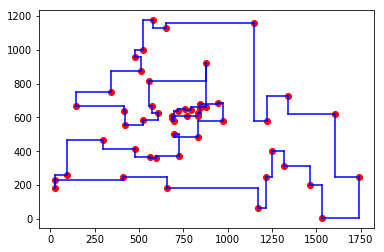

In [57]:
hillclimb(data[:,1:], 1000)

In [58]:
def burn(points, it):
    beg = 100000
    limit = 0.1
    temp = beg
    
    state = np.random.permutation(points.shape[0])
    state = np.append(state, [state[0]])
    f_st = len_path(state, points)

    for i in range(1,it):
        new_state = gen_state(state)
        f_new = len_path(new_state, points)

        if f_new <= f_st:
            state, f_st = new_state, f_new
        else:
            if np.exp((f_st-f_new)/temp)>= np.random.rand(1):
                state, f_st = new_state, f_new
        temp = beg * 0.1 / i
        if temp <= limit:
            break
    print("length="+str(f_st))
    draw2(state, points)

length=10100


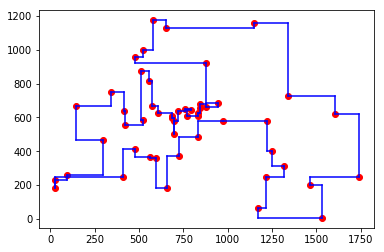

In [59]:
burn(data[:,1:], 1000000)

In [60]:
def produce(s1, s2):
    state1, state2 = s1[:-1], s2[:-1]
    delim = random.choice(state1)
    idx1 = np.argwhere(state1 == delim)
    idx2 = np.argwhere(state2 == delim)
    n = state1.shape[0]
    idx1 -= 1
    idx2 += 1
    aval1 = idx1 >= 0
    aval2 = idx2 < n
    res_state = [delim]
    while aval1 and aval2:
        if state1[idx1] not in res_state:
            res_state.append(state1[idx1])
        if state2[idx2] not in res_state:
            res_state.append(state2[idx2])
        idx1 -= 1
        idx2 += 1
        aval1, aval2 = idx1 >= 0, idx2 < n
    r_p = np.random.permutation(n)
    for i in r_p:
        if state1[i] not in res_state:
            res_state.append(state1[i])
#     res_state.append(res_state[0])
    return np.array(res_state)

In [61]:
def mutate(state):
    if np.random.rand(1)>0.2:
        ix = np.random.permutation(state.shape[0])[:2]
        state[ix[0]], state[ix[1]] = state[ix[1]], state[ix[0]]
    return state

In [67]:
###5###
def genetic(points, it, size):
    population = np.zeros((size, points.shape[0] + 1), dtype=int)
    f_polt = np.zeros(size)
    for i in range(size):
        state = np.random.permutation(points.shape[0])
        state = np.append(state, [state[0]])
        f_st = len_path(state, points)
        population[i] = np.copy(state)
        f_polt[i] = f_st
        
    for i in range(1,it):
        sort_ind = np.argsort(f_polt)
        max_ind = sort_ind[-1]
        ad1 = 0
        ad2 = 0
        if np.random.rand(1)>0.6:
            ad1 = np.random.randint(8)
            ad2 = np.random.randint(8)
        min_ind1 = sort_ind[0+ad1]
        min_ind2 = sort_ind[1+ad2]

        new_state = produce(population[min_ind1], population[min_ind2])
        new_state = mutate(new_state)
        new_state = np.append(new_state, new_state[0])
        f_new = len_path(new_state, points)
        population[max_ind] = new_state
        f_polt[max_ind] = f_new
    state = population[np.argmin(f_polt)]
    print("lenght = " + str(f_polt[np.argmin(f_polt)]))
    draw2(state, points)

lenght = 26620.0


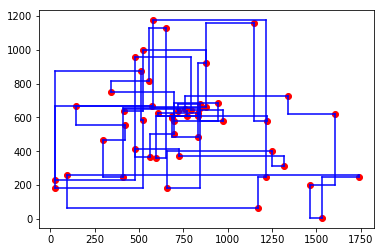

In [68]:
genetic(data[:,1:], 10000, 16)